In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from collections import Counter

In [61]:
X,Y = make_classification(n_samples=100000,n_features=2,n_informative=2,
                        n_redundant=0,n_repeated=0,n_classes=2,
                        n_clusters_per_class=1,
                        weights=[0.995,0.005],
                        class_sep=0.5,random_state=0)
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
df['target'].value_counts(normalize=True)

0    0.9897
1    0.0103
Name: target, dtype: float64

In [62]:
df['target'].value_counts()

0    98970
1     1030
Name: target, dtype: int64

In [63]:
df.head()

,feature1,feature2,target
0,1.236497,0.579272,0
1,-0.188720,-0.022001,0
2,-0.653844,0.794309,0
3,0.005572,0.593370,0
4,0.482573,0.796902,0


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print('training dataset' , X_train.shape[0])
print('test dataset' , X_test.shape[0] )

training dataset 80000
test dataset 20000


In [66]:
print (sorted(Counter(y_train).items()))

[(0, 79183), (1, 817)]


In [69]:
rf=RandomForestClassifier()
baseline_model=rf.fit(X_train,y_train)
baseline_prediction = baseline_model.predict(X_test)
print(classification_report(y_test,baseline_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.46      0.03      0.05       213

    accuracy                           0.99     20000
   macro avg       0.73      0.51      0.52     20000
weighted avg       0.98      0.99      0.98     20000



Random over sampling

In [70]:
ros=RandomOverSampler(random_state=42)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 79183), (1, 79183)]


Text(0.5, 1.0, 'Random Over Sampling')

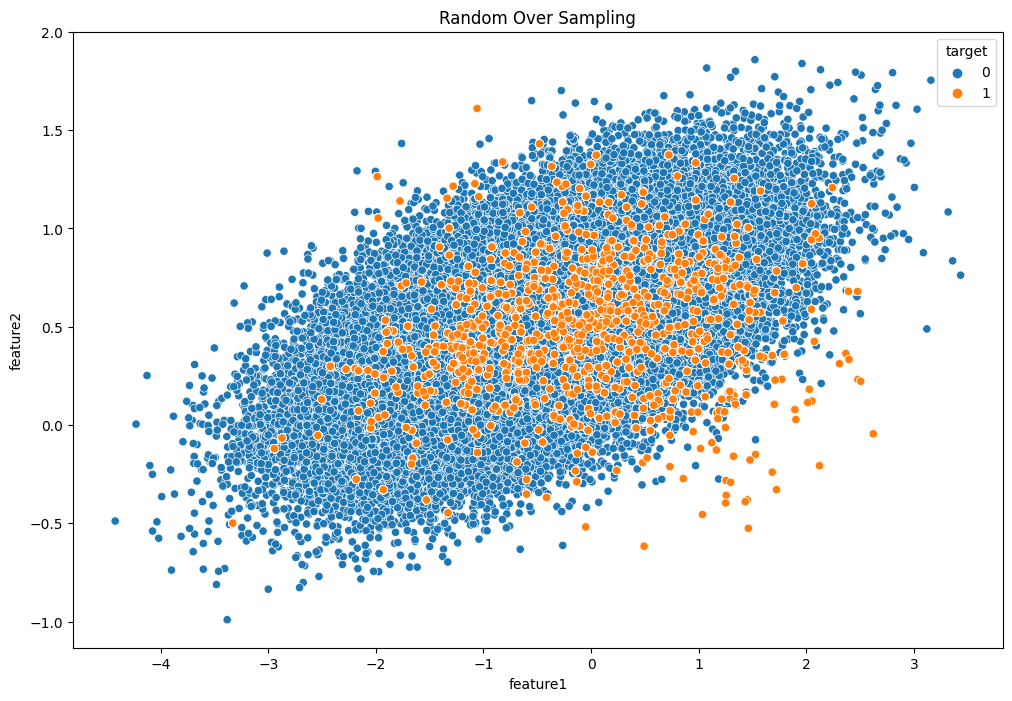

In [72]:
df_ros = pd.DataFrame({'feature1':X_train_ros[:,0],'feature2':X_train_ros[:,1],'target':y_train_ros})
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1',y='feature2', hue='target',data=df_ros)
plt.title('Random Over Sampling')

SMOTE Under Sampling

In [73]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 79183), (1, 79183)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

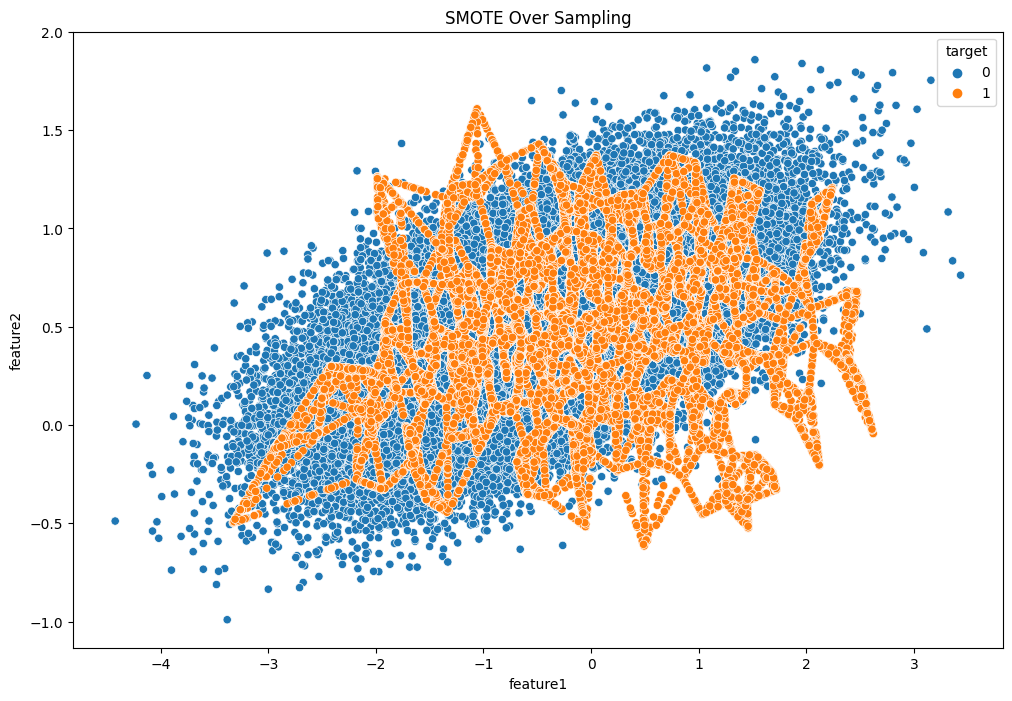

In [74]:
df_smote = pd.DataFrame({'feature1':X_train_smote[:,0],'feature2':X_train_smote[:,1],'target':y_train_smote})
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1',y='feature2', hue='target',data=df_smote)
plt.title('SMOTE Over Sampling')

Random Under Sampling

In [76]:
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 817), (1, 817)]


Text(0.5, 1.0, 'Random Under Sampling')

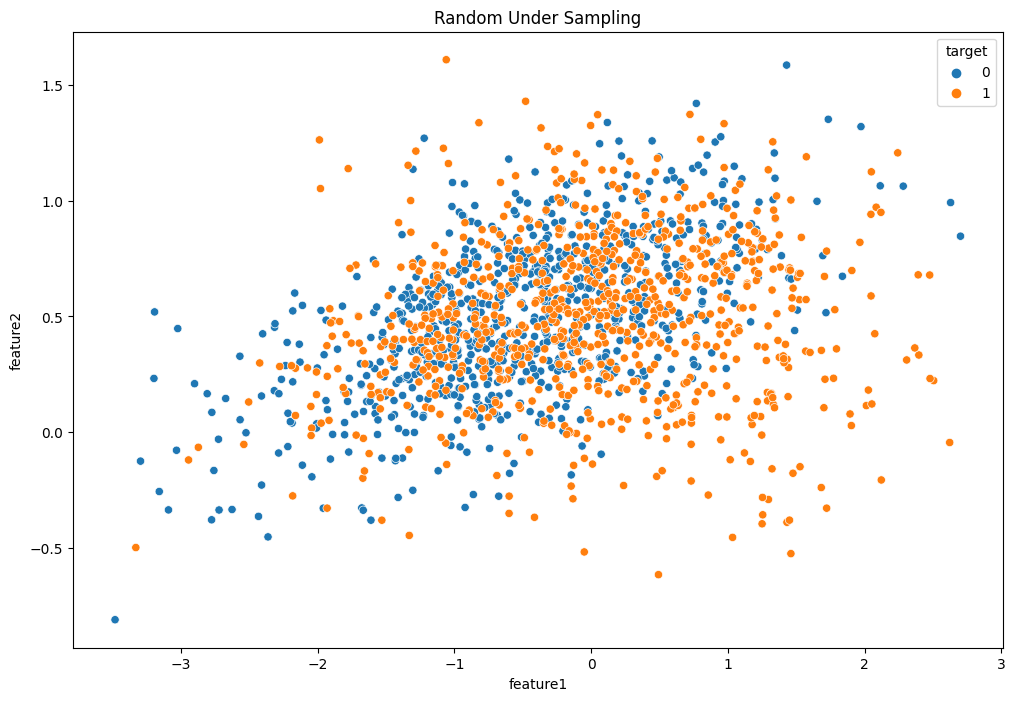

In [77]:
df_rus = pd.DataFrame({'feature1':X_train_rus[:,0],'feature2':X_train_rus[:,1],'target':y_train_rus})
plt.figure(figsize=(12,8))
sns.scatterplot(x='feature1',y='feature2', hue='target',data=df_rus)
plt.title('Random Under Sampling')

2_Central tendencies of data

In [30]:
df=pd.read_csv('covid_19_india.csv',skiprows=[0])
df.head()

,1,2020-01-30,6:00 PM,Kerala,1.1,0,0.1,0.2,1.2
0,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
1,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
2,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
3,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
4,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df['0.1']

0              0
1              0
2              0
3              0
4              0
          ...   
18104     638410
18105      77811
18106     334650
18107    1685492
18108    1506532
Name: 0.1, Length: 18109, dtype: int64

In [4]:
summary = df['0.1' ].describe()
summary['var'] = summary['std']**2
summary.round(2)

count    1.810900e+04
mean     2.786529e+05
std      6.149044e+05
min      0.000000e+00
25%      3.361000e+03
50%      3.337000e+04
75%      2.788800e+05
max      6.159676e+06
var      3.781074e+11
Name: 0.1, dtype: float64

In [5]:
summary.to_csv("summary.csv")

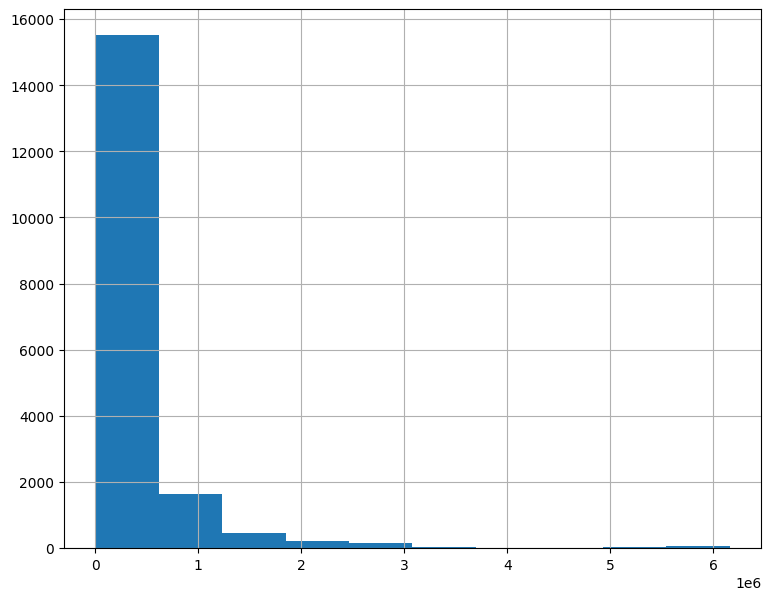

In [6]:
ax=df['0.1'].hist(figsize=(9,7))
plt.show()

3_Five number summary

In [7]:
np.random.seed(seed=12345)
data = np.random.normal(scale=1,size=500)

In [8]:
def fivenumsum_percentile(data):
    print('5-number summary using percentile')
    five_num_sum = np.percentile(data,[0,25,50,75,100],interpolation='linear')
    print('min:{0:6f}'.format(five_num_sum[0]))
    print('25%:{0:6f}'.format(five_num_sum[1]))
    print('50%:{0:6f}'.format(five_num_sum[2]))
    print('75%:{0:6f}'.format(five_num_sum[3]))
    print('max:{0:6f}'.format(five_num_sum[4]))
fivenumsum_percentile(data)

5-number summary using percentile
min:-2.644409
25%:-0.726389
50%:-0.017074
75%:0.638229
max:3.927528


C:\Users\Personal\AppData\Local\Temp\ipykernel_31416\2766243358.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  five_num_sum = np.percentile(data,[0,25,50,75,100],interpolation='linear')


4_z-score and p-value

In [9]:
from scipy.special import ndtr as ndtr
np.random.seed(8)

In [10]:
mu, sigma = 50,10
norm_dist = np.random.normal(mu,sigma,100)

In [11]:
norm_dist[99] = 120

In [12]:
df=pd.DataFrame(norm_dist,columns=['Data'])
df.head()

,Data
0,50.912047
1,60.912827
2,30.530297
3,36.136505
4,27.035084


In [13]:
df.tail()

,Data
95,61.500813
96,50.844455
97,74.862478
98,48.056446
99,120.000000


In [14]:
for col in df.columns:
    col_zscore = col+'_zscore'
    df[col_zscore]=(df[col]-df[col].mean())/df[col].std(ddof=0)
    

In [15]:
df.tail()

,Data,Data_zscore
95,61.500813,0.770217
96,50.844455,-0.037144
97,74.862478,1.782541
98,48.056446,-0.248373
99,120.000000,5.202310


In [16]:
df['Data_p_values'] = 1-ndtr(df['Data_zscore'])

In [17]:
df.tail()

,Data,Data_zscore,Data_p_values
95,61.500813,0.770217,2.205856e-01
96,50.844455,-0.037144,5.148150e-01
97,74.862478,1.782541,3.733051e-02
98,48.056446,-0.248373,5.980771e-01
99,120.000000,5.202310,9.841316e-08


In [18]:
significance = 0.025

In [19]:
df['statistically_significant'] = (df.Data_p_values > significance).astype(int)

In [20]:
df

,Data,Data_zscore,Data_p_values,statistically_significant
0,50.912047,-0.032023,5.127732e-01,1
1,60.912827,0.725669,2.340208e-01,1
2,30.530297,-1.576213,9.425116e-01,1
3,36.136505,-1.151468,8.752300e-01,1
4,27.035084,-1.841021,9.671908e-01,1
...,...,...,...,...
95,61.500813,0.770217,2.205856e-01,1
96,50.844455,-0.037144,5.148150e-01,1
97,74.862478,1.782541,3.733051e-02,1
98,48.056446,-0.248373,5.980771e-01,1


In [21]:
df.loc[df.statistically_significant ==0,:]

,Data,Data_zscore,Data_p_values,statistically_significant
99,120.0,5.20231,9.841316e-08,0


5_Plot different Distributions

In [22]:
import scipy.stats as stats

In [23]:
 uniform_data = stats.uniform.rvs(size=100000,loc=0,scale=10)

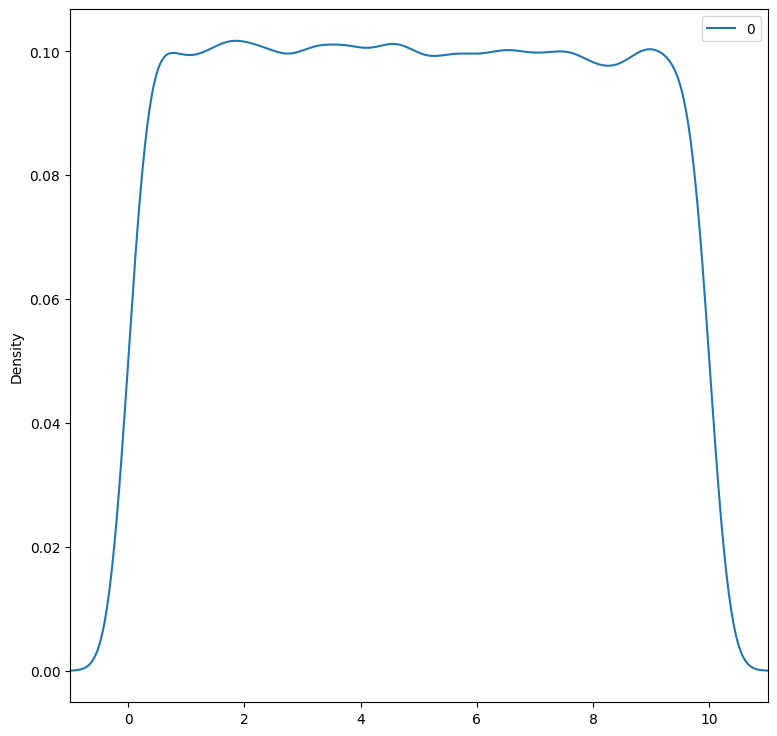

In [24]:
pd.DataFrame(uniform_data).plot(kind="density",figsize=(9,9),xlim=(-1,11));

In [25]:
stats.uniform.cdf(x=2.5,loc=0,scale=10)

0.25

In [26]:
stats.uniform.ppf(q=0.4,loc=0,scale=10)

4.0

In [27]:
for x in range(-1,12,3):
    print("Density at x value" + str (x))
    print(stats.uniform.pdf(x ,loc=0,scale=10))

Density at x value-1
0.0
Density at x value2
0.1
Density at x value5
0.1
Density at x value8
0.1
Density at x value11
0.0


In [28]:
import random
random.seed(12)
print([random.uniform(0,10) for x in range(4)])
random.seed(12)
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Normal distribution

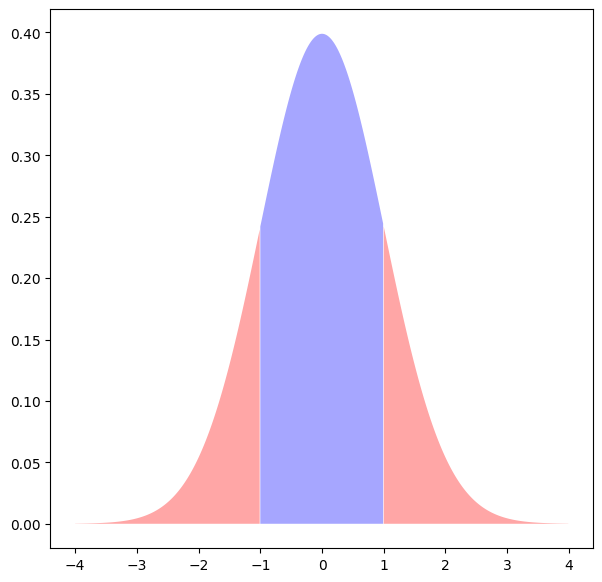

In [31]:
 
plt.rcParams["figure.figsize"]=(7,7)
plt.fill_between(x=np.arange(-4,-1,0.01),y1=stats.norm.pdf(np.arange(-4,-1,0.01)),facecolor='red',alpha=0.35)
plt.fill_between(x=np.arange(1,4,0.01),y1=stats.norm.pdf(np.arange(1,4,0.01)),facecolor='red',alpha=0.35)
plt.fill_between(x=np.arange(-1,1,0.01),y1=stats.norm.pdf(np.arange(-1,1,0.01)),facecolor='blue',alpha=0.35)
 

Binomial distribution

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  12  80  454  1188  2079  2452  2012  1187  437  91   8


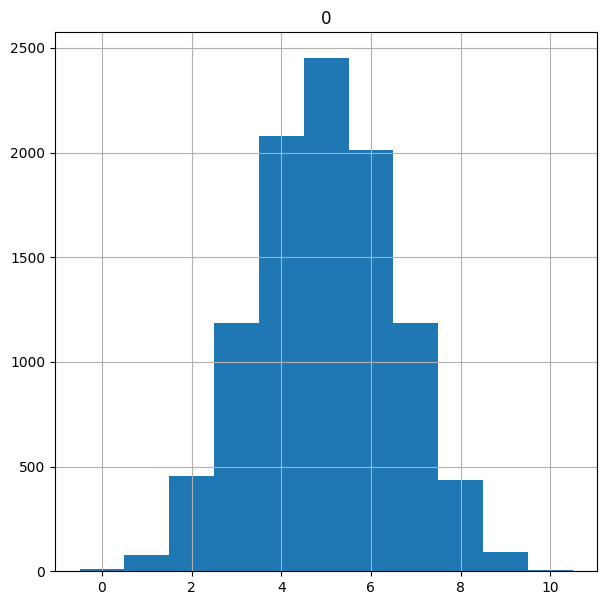

In [ ]:
fair_coin_flips=stats.binom.rvs(n=10,p=0.5,size=10000)
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11);

Geometric and Exponential distribution

col_0     1     2     3    4    5    6   7   8   9   10  11  12  16
row_0                                                              
counts  5034  2493  1262  636  285  130  84  38  21  11   3   2   1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

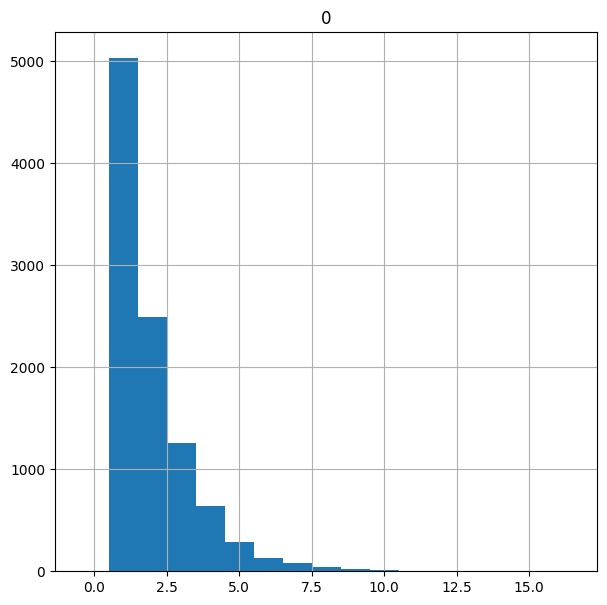

In [ ]:
random.seed(12)
flips_till_heads=stats.geom.rvs(size=10000,p=0.5)
print(pd.crosstab(index="counts",columns=flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5),bins=max(flips_till_heads)+1)

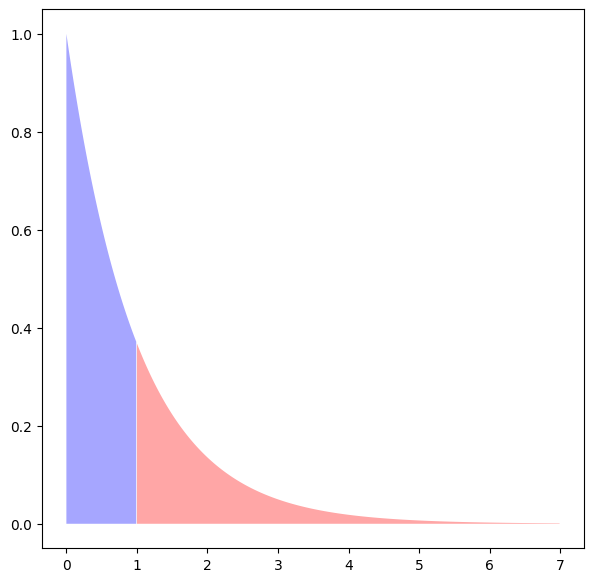

In [32]:
plt.fill_between(x=np.arange(0,1,0.01),y1=stats.expon.pdf(np.arange(0,1,0.01)),facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(1,7,0.01),y1=stats.expon.pdf(np.arange(1,7,0.01)),facecolor ='red',alpha=0.35)
 

Poisson distribution

col_0      0     1     2    3    4   5  6  7
row_0                                       
counds  3659  3700  1871  597  145  23  4  1


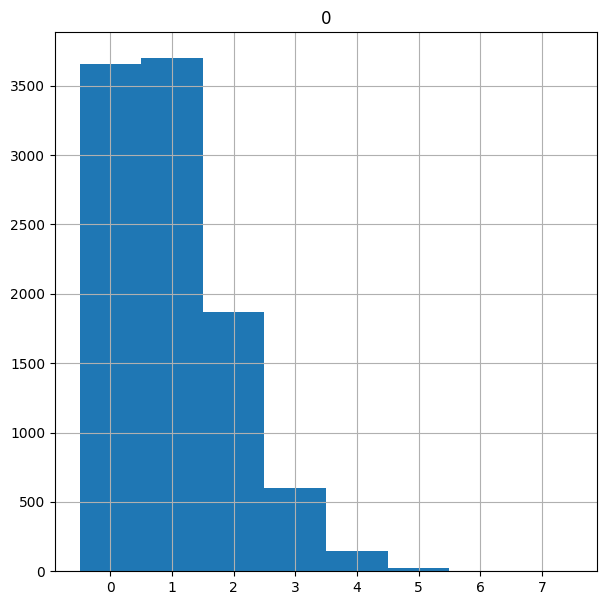

In [ ]:
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000,mu=1)
print(pd.crosstab(index="counds",columns=arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),bins=max(arrival_rate_1)+1);

6_t-test value and Chi square value

In [36]:
from scipy.stats import ttest_ind
drinks_before = np.random.normal(2.,0.9,1000)
drinks_after = np.random.normal(1.8,0.7,1000)
ttest = ttest_ind(drinks_before,drinks_after)
ttest

Ttest_indResult(statistic=5.015780047900834, pvalue=5.748731290685459e-07)

chi square test

In [41]:
from scipy.stats import chi2_contingency
tbl = np.array([[40,10],[25,25]])
re = chi2_contingency(tbl)
re

(8.615384615384615,
 0.003333354025136573,
 1,
 array([[32.5, 17.5],
        [32.5, 17.5]]))

7_Plot different correlations

In [42]:
import scipy.stats as st
import seaborn as sns

In [45]:
data=pd.read_excel('Sample - Superstore.xls')

Correlation using Numpy

In [46]:
np.corrcoef(data['Sales'],data['Profit'])

array([[1.        , 0.47906435],
       [0.47906435, 1.        ]])

Using Scipy

In [47]:
st.pearsonr(data['Sales'],data['Profit'])

PearsonRResult(statistic=0.4790643497377064, pvalue=0.0)

<AxesSubplot:ylabel='Profit'>

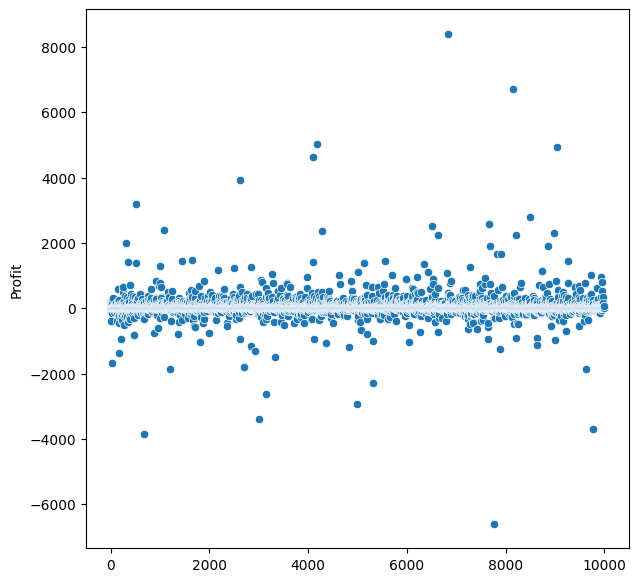

In [52]:
sns.scatterplot( data['Profit'])

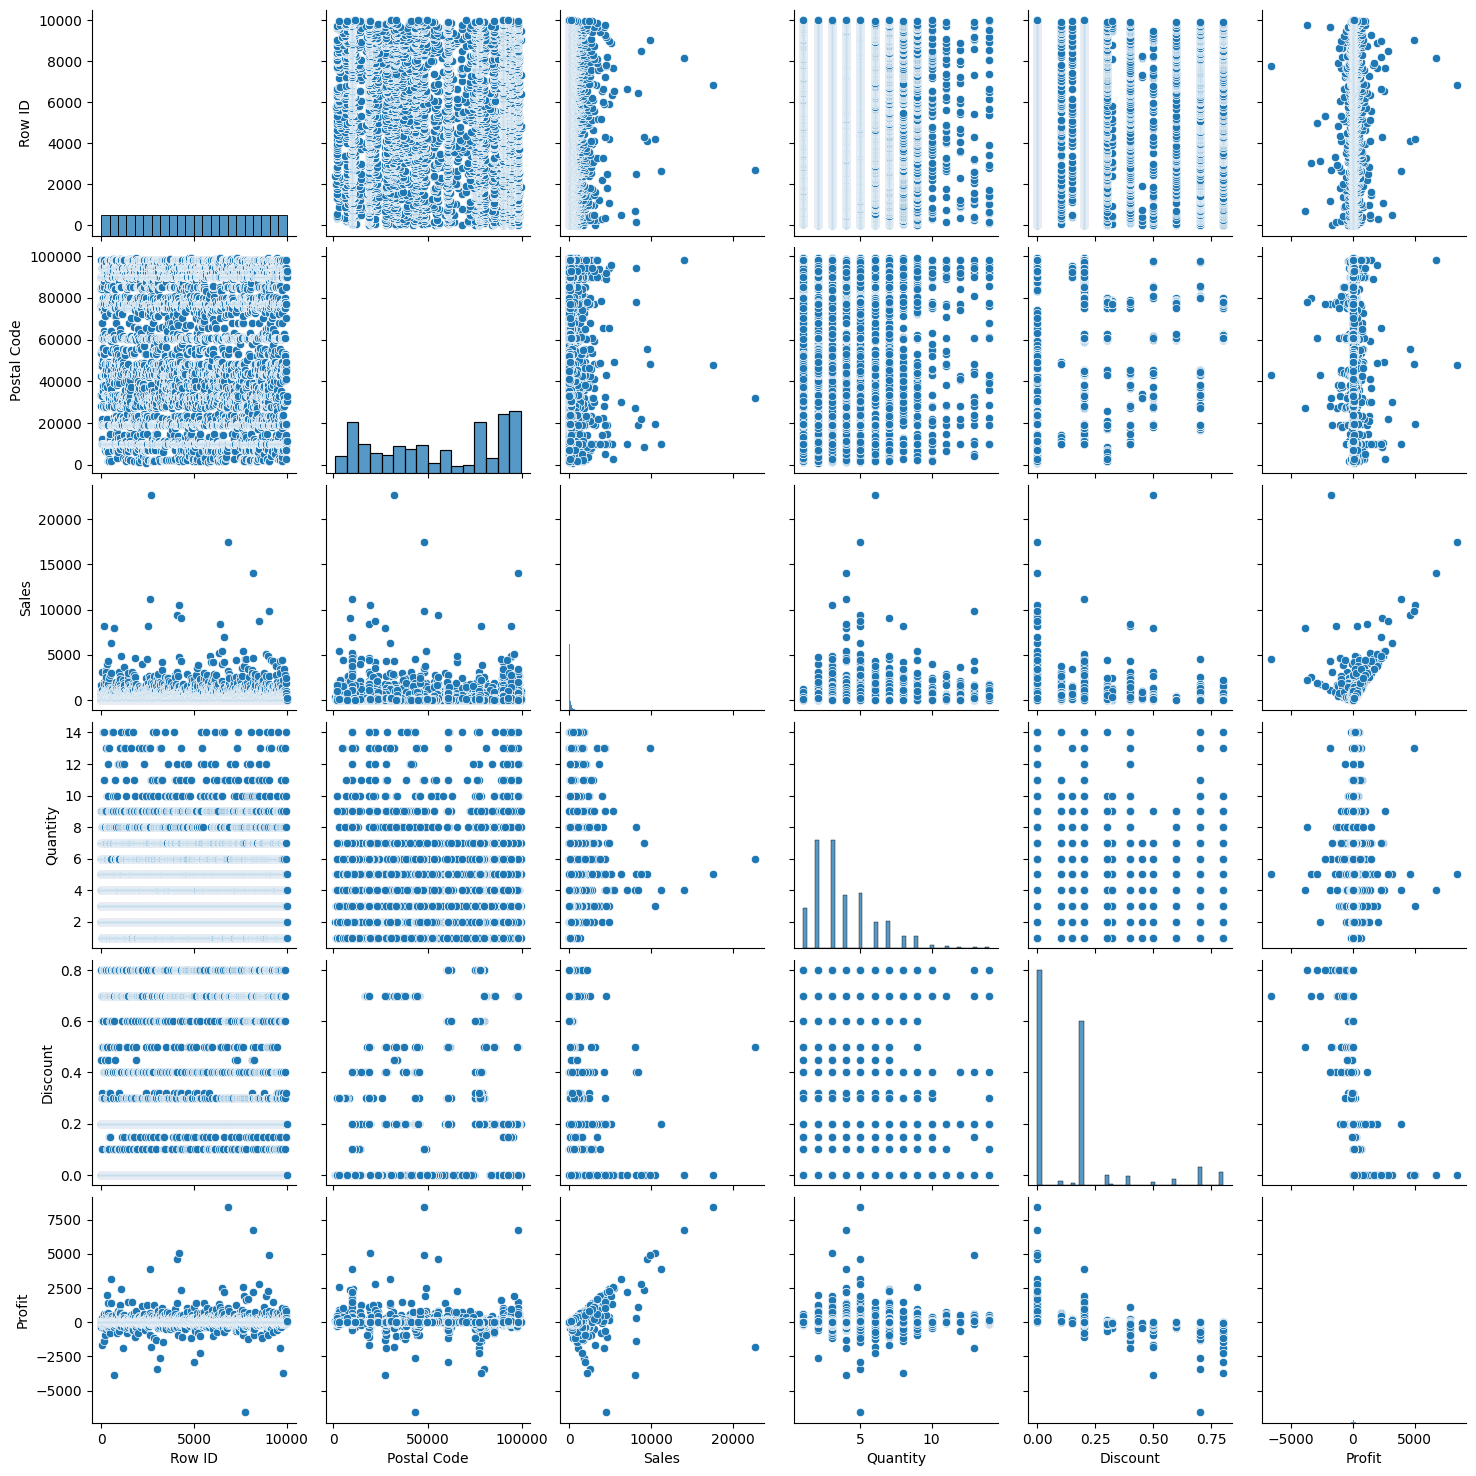

In [53]:

sns.pairplot(data)

In [54]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

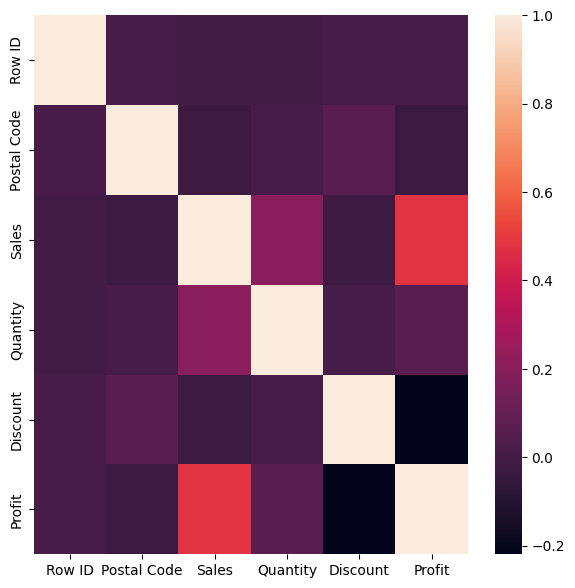

In [55]:
sns.heatmap(data.corr())